# What is probability? A simulated introduction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline
sns.set()

## Learning Objectives:
- To have an understanding of what "probability" means, in both Bayesian and Frequentist terms;
- To be able to simulate probability distributions that model real-world phenomena;
- To understand how probability distributions relate to data-generating **stories**.

## Probability

> To the pioneers such as Bernoulli, Bayes and Laplace, a probability represented a _degree-of-belief_ or plausibility; how much they thought that something was true, based on the evidence at hand. To the 19th century scholars, however, this seemed too vague and subjective an idea to be the basis of a rigorous mathematical theory. So they redefined probability as the _long-run relative frequency_ with which an event occurred, given (infinitely) many repeated (experimental) trials. Since frequencies can be measured, probability was now seen as an objective tool for dealing with _random_ phenomena.

-- _Data Analysis, A Bayesian Tutorial_, Sivia & Skilling (p. 9)

What type of random phenomena are we talking about here? One example is:

- Knowing that a website has a click-through rate (CTR) of 7%, we can calculate the probability of having 7 people, 6 people, 5 people ... and so on click through, upon drawing 10 people randomly from the population;

- But given the data of how many people click through, how can we calculate the CTR? And how certain can we be of this CTR? Or how likely is a particular CTR?

Science mostly asks questions of the second form above & Bayesian thinking provides a wonderful framework for answering such questions. 
Essentially Bayes' Theorem gives us a way of **moving from the probability of the data given the model (written as $P(data|model)$) to the probability of the model given the data ($P(model|data)$)**.

We'll first explore questions of the 1st type using simulation: knowing the model, what is the probability of seeing certain data?

## Probabilities simulation

- Lets say that a website has a CTR of 50%; if we pick 1000 people at random, how likely would it be to find that a certain number of people click?

To do that, we can use `np.random.rand()` to randomly select fractions (floating point numbers) between 0 & 1: **Uniform Distribution**

In [2]:
# Draw 1000 people (sample) from a uniform distribution
x = np.random.rand(1000)

(array([101.,  90.,  97.,  92.,  85.,  95., 116., 106., 104., 114.]),
 array([7.06148634e-04, 1.00597046e-01, 2.00487942e-01, 3.00378839e-01,
        4.00269736e-01, 5.00160633e-01, 6.00051530e-01, 6.99942427e-01,
        7.99833324e-01, 8.99724221e-01, 9.99615118e-01]),
 <BarContainer object of 10 artists>)

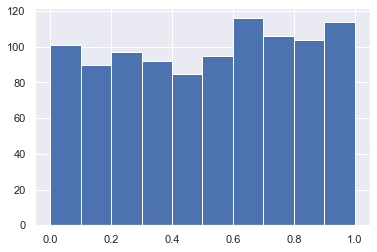

In [3]:
plt.hist(x)

In order to simulate the sampling, we can check whether that each of the float numbers genereated was greater or less than 0.5:
- If ><= 0.5: person clicked.
- If > 0.5: person did not click.

In [4]:
clicks = x <= 0.5
num_clicks = sum(clicks)
print("Number of clicks: {}".format(num_clicks))

Number of clicks: 465


To calculate the proportion (percentage) of people who clicked by dividing the number of clicks over the sample size:

In [6]:
print("Proportion who clicked: {}".format(num_clicks/len(clicks)))

Proportion who clicked: 0.465


If I to run this experiment more than once, will I get the same answer? why/why not ? **Random process**

We have a *statistical model*; that half of the choosen people will click.

We have a *statistical model*; that half of the choosen people will click, then we draw a *sample* , then we draw a *sample* and then we had our conclusion/realisation of the model

## Quiz: Bias coin flip
- instead of a  CTR of 50%; What if CTR is 70%? How many clicks? what us the proportion?

In [7]:
clicks = x<= 0.7
num_clicks = sum(clicks)
print("Number of clicks: {}".format(num_clicks))
print("Proportion who clicked: {}".format(num_clicks/len(clicks)))

Number of clicks: 676
Proportion who clicked: 0.676


Where do we see this model? *Binary approximation* or **Bernoulli tirals**

## Finch beaks

We are going to use a dataset for finch beak measurements to calculate similar proportions. Dataset can be found [here](https://datadryad.org/resource/doi:10.5061/dryad.9gh90)

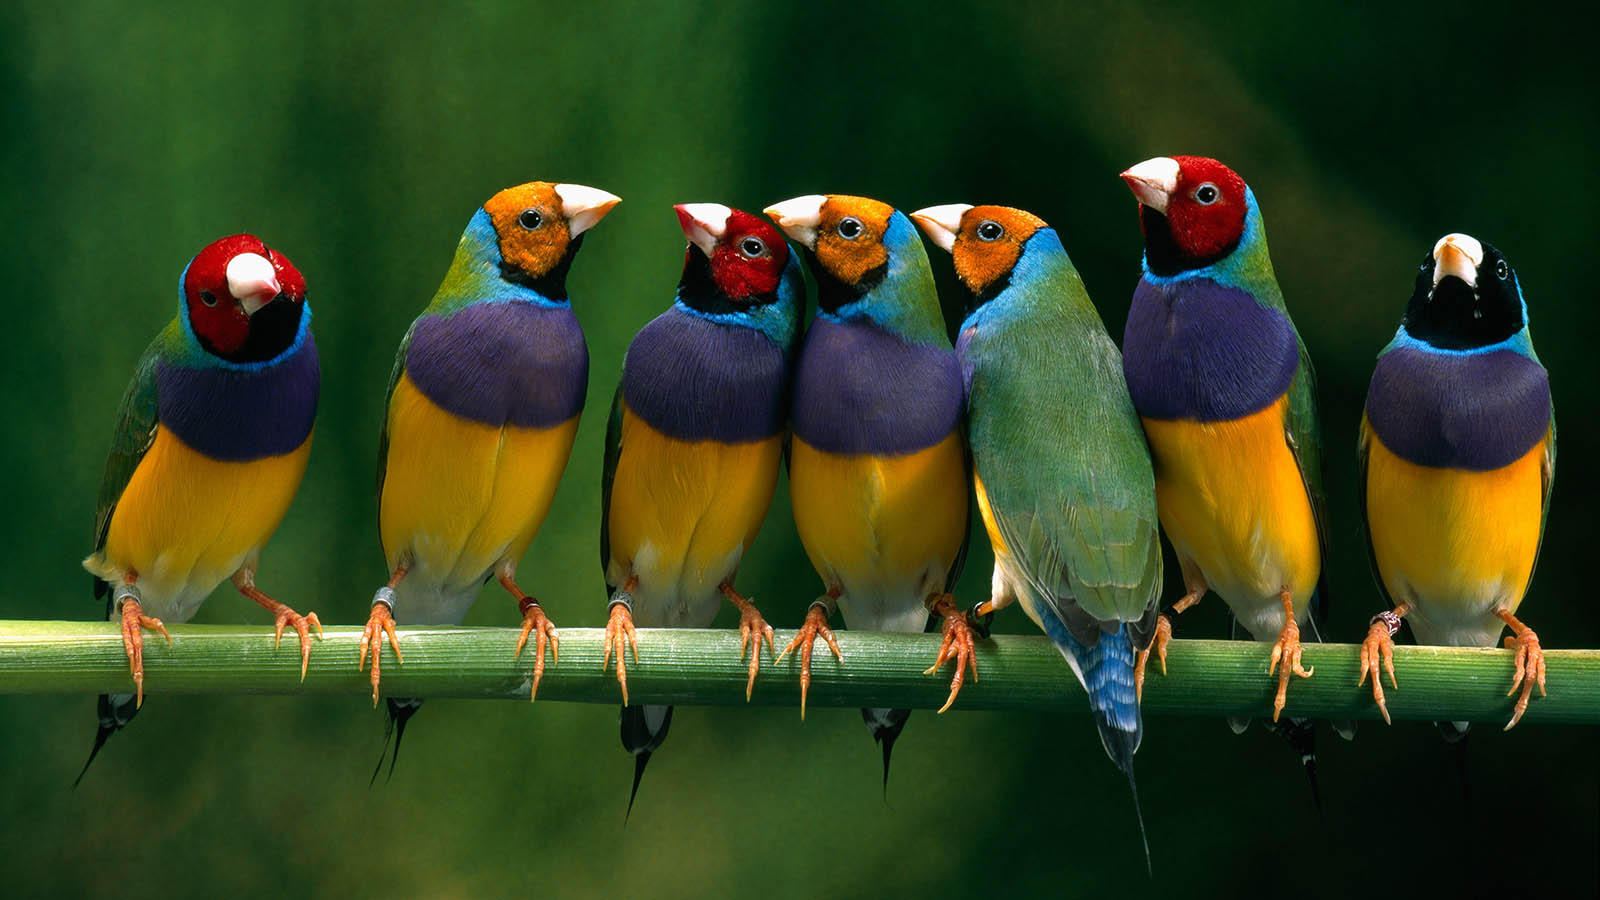

In [63]:
Image(filename="./imgs/finch-1.jpg",width=500, height=500)

In [8]:
df1 = pd.read_csv("data/finch_beaks_2012.csv")
df1.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [9]:
lengths = df1["blength"]

What proportion of finches have a beak of length > 10?

In [10]:
b_prop = sum(lengths > 10)/len(lengths)
b_prop

0.8514056224899599

**Note:** This is the proportion of birds that have beak length $>10$ in the data, not the probability that any bird drawn from the population will have beak length $>10$.

## A proxy for probability
We have calculated a proportion, not a probability. As a proxy for the probability, we can simulate drawing random samples (with replacement) from the data to see how many lengths are > 10 and calculate the proportion (commonly referred to as [hacker statistics](https://speakerdeck.com/jakevdp/statistics-for-hackers)):

In [11]:
n_samples = 10000
b_probability = sum(np.random.choice(lengths,n_samples,replace=True)>10)/n_samples
b_probability

0.8459

In [12]:
print("Difference in estimation: {}".format(abs(b_probability-b_prop)))

Difference in estimation: 0.005505622489959894


We ran the simulation above, assuming that the finch beak lengths are *uniformly distributed*; that each length in the data is assumed to have an equal degree of beilef to exist.

## Another way to simulate the *Biased coin flip*

- Above, we used the uniform distribution to simulate a biased coin flip.
- **Binomial distribution** with parameters $n$ and $p$ is the probability of:
> The number of heads seen when flipping a coin $n$ times with $p(heads)=p$
- The binomial ditribution gives us the story or **the belief** about aany underlying process that generates data in a binary fashion, and onr of the only 2 outcomes of this process occur with a probability $p$.

Let's use the binomial distribution to simulate the above biased coin flip:
- if $p(heads)=0.7$, and we flip the coin *10 times*, how many heads will come?

In [13]:
seed = np.random.seed(seed=42)
np.random.binomial(n=10,p=0.7)

8

In the above, we have simulated the scenario once. But this only tells us one potential outcome. To see how likely it is to get $n$ heads, for example, we need to simulate it a lot of times and check what proportion ended up with $n$ heads.

(array([0.00033333, 0.00111111, 0.01177778, 0.03744444, 0.11588889,
        0.22      , 0.29166667, 0.26511111, 0.138     , 0.02977778]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

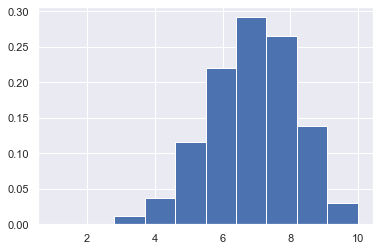

In [18]:
x = np.random.binomial(10,0.7,n_samples)
plt.hist(x,density=True,bins=10)

### Hands-on: Probabilities

- If I flip a biased coin ($P(H)=0.3$) 20 times, what is the probability of 5 or more heads?

In [19]:
x2 = np.random.binomial(n=20,p=0.3,size = n_samples)
sum(x2>=5)/n_samples

0.7694

(array([0.00535714, 0.02071429, 0.13864286, 0.12814286, 0.13628571,
        0.205     , 0.0455    , 0.03128571, 0.00214286, 0.00121429]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

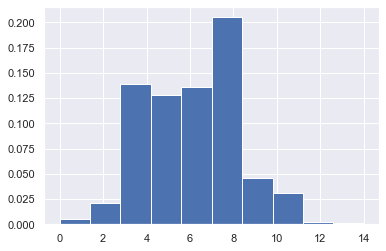

In [20]:
plt.hist(x2,density=True,bins=10)

- If I flip a fair coin 20 times, what is the probability of 5 or more heads?

In [21]:
x3 = np.random.binomial(20,0.5,n_samples)
sum(x3>=5)/n_samples

0.9941

(array([0.00421429, 0.00957143, 0.08078571, 0.08264286, 0.11328571,
        0.24157143, 0.09028571, 0.07878571, 0.00914286, 0.004     ]),
 array([ 3. ,  4.4,  5.8,  7.2,  8.6, 10. , 11.4, 12.8, 14.2, 15.6, 17. ]),
 <BarContainer object of 10 artists>)

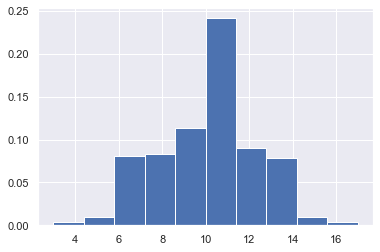

In [22]:
plt.hist(x3,density=True,bins=10)

- Plot the normalized histogram of number of heads of the following experiment: flipping a fair coin 10 times.

(array([0.0011, 0.0096, 0.0407, 0.1166, 0.2098, 0.2462, 0.2095, 0.1175,
        0.0386, 0.0104]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

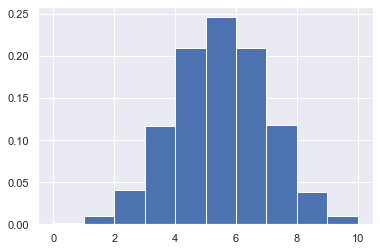

In [23]:
x4 = np.random.binomial(10,0.5,n_samples)
plt.hist(x4,density=True,bins=10)

### Question
What is the probability of getting 5 or more heads?

**Note:** you may have noticed that the _binomial distribution_ can take on only  a finite number of values, whereas the _uniform distribution_ above can take on any number between $0$ and $1$. The former is called a _probability mass function_ (PMF) and the latter a _probability distribution function_ (PDF).

In [97]:
def cdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

In [98]:
x_flips, y_flips = cdf(x4)

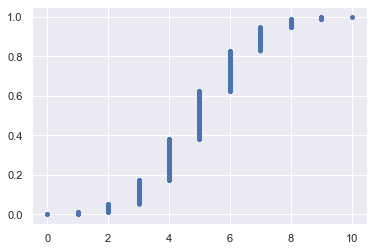

In [99]:
plt.plot(x_flips,y_flips, marker='.',linestyle='none')

**Probabilities are credibility points assigned to the number line**
- We can simulate draws from a probablitiy distribution.
- We can simulate draws from our data, by sampling with *sampling with replacement*.
- We can take advantage of the analytical form of a probability distribution, and use that to simulate **how our data might look like under set of parameters**

## Probability distributions

- Probablity distributions are *generative models*

### Poisson distribution & Poisson process:

[Information Theory, Inference and Learning Algorithms](https://www.amazon.com/Information-Theory-Inference-Learning-Algorithms/dp/0521642981)

This book tells the tale of a town called Poissonville, in which the buses have an odd schedule. Standing at a bus stop in Poissonville, the amount of time you have to wait for a bus is totally independent of when the previous bus arrived, meaning that a bus could drive off and another arrives almost instantaneously, or you could wait for hours.

Arrival of buses in Poissonville is called a **Poisson process**. The timing of the next event is completely independent of when the previous event happened. Other examples of a Poisson processes:
- Landing on a website.
- Aviation incidents.

In [100]:
samples = np.random.poisson(lam=6,size=10**6)

(array([1.64752381e-02, 4.25914286e-02, 8.55419048e-02, 1.27086667e-01,
        1.52525714e-01, 1.53584762e-01, 1.30504762e-01, 9.86752381e-02,
        6.55676190e-02, 3.93428571e-02, 2.14114286e-02, 1.06790476e-02,
        4.93809524e-03, 2.16476190e-03, 8.09523810e-04, 3.21904762e-04,
        1.04761905e-04, 3.61904762e-05, 1.23809524e-05, 6.66666667e-06]),
 array([ 0.  ,  1.05,  2.1 ,  3.15,  4.2 ,  5.25,  6.3 ,  7.35,  8.4 ,
         9.45, 10.5 , 11.55, 12.6 , 13.65, 14.7 , 15.75, 16.8 , 17.85,
        18.9 , 19.95, 21.  ]),
 <BarContainer object of 20 artists>)

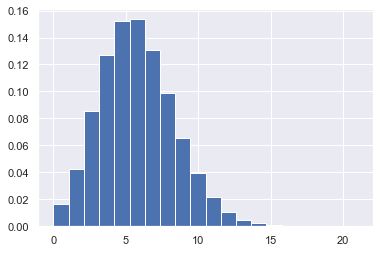

In [104]:
plt.hist(samples,density=True,bins=20)

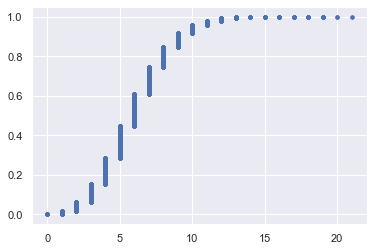

In [105]:
x_p, y_p = cdf(samples)
plt.plot(x_p,y_p, marker='.',linestyle='none')

### Exponential distribution:

We've encountered a variety of named *discrete distributions*. There are also *continuous distributions*, such as the **Exponential** distribution and the **Normal (or Gaussian)** distribution.
*The waiting time between arrivals of a Poisson process are exponentially distributed* & it has a single parameter, the mean time between events.

In [106]:
df2 = pd.read_csv('data/nuclear_power_accidents.csv')
df2.head()

,Date,Location,Cost (millions 2013US$),INES,Smyth Magnitude,Region,Description,Fatalities
0,4/26/1986,"Kiev, Ukraine",259336.0,7.0,8.0,EE,Mishandled reactor safety test at Chernobyl nu...,4056
1,3/11/2011,"Fukushima Prefecture, Japan",166089.0,7.0,7.5,A,An earthquake and tsunami caused emergency bac...,573
2,12/8/1995,"Tsuruga, Japan",15500.0,NaN,NaN,A,Japan's only fast breeder reactor Monju suffer...,0
3,3/28/1979,"Middletown, Pennsylvania, United States",10910.0,5.0,7.9,NaN,Equipment failure and operator error contribut...,0
4,9/11/1957,"Rocky Flats, USA",8189.0,5.0,5.2,NaN,Fire starts and destroys plutonium processing ...,0


In [110]:
df2.Date = pd.to_datetime(df2.Date)
df2 = df2[df2.Date >=pd.to_datetime('1974-01-01')]
df2.head()

,Date,Location,Cost (millions 2013US$),INES,Smyth Magnitude,Region,Description,Fatalities
0,1986-04-26,"Kiev, Ukraine",259336.0,7.0,8.0,EE,Mishandled reactor safety test at Chernobyl nu...,4056
1,2011-03-11,"Fukushima Prefecture, Japan",166089.0,7.0,7.5,A,An earthquake and tsunami caused emergency bac...,573
2,1995-12-08,"Tsuruga, Japan",15500.0,NaN,NaN,A,Japan's only fast breeder reactor Monju suffer...,0
3,1979-03-28,"Middletown, Pennsylvania, United States",10910.0,5.0,7.9,NaN,Equipment failure and operator error contribut...,0
6,1977-01-01,"Beloyarsk, USSR",3500.0,5.0,NaN,EE,"Unit 2 suffers a half core meltdown, repairs t...",0


In [111]:
interval_times = np.diff(np.sort(df2.Date)).astype(float)/1e9/3600/24

In [113]:
mean = np.mean(interval_times)
samples = np.random.exponential(mean,size=10**6)
x,y = cdf(interval_times)
x_calculated, y_calculated = cdf(samples)

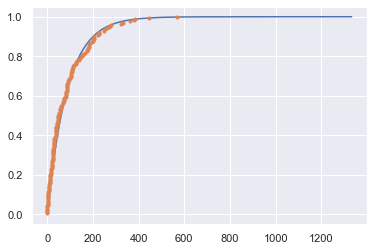

In [115]:
plt.plot(x_calculated,y_calculated)
plt.plot(x,y,marker='.',linestyle='none')

### Normal Distribution (Gaussian):

> When doing repeated experiments (measurements), that many data generating subprocesses contributes to that measurement; hence we expect Normal distribution.

> Central Limit Theorem: **any quantity that emerges as the sum of a large number of subprocesses tends to be Normally distributed** provided none of the subprocesses is very broadly distributed.

In [129]:
import scipy.stats as st
df3 = pd.read_csv('data/michelson_speed_of_light.csv')
df3 = df3.rename(columns={'velocity of light in air (km/s)': 'c'})
c = df3.c.values
x_s = np.linspace(299.6,300.1,400)*1000

Text(0, 0.5, 'PDF')

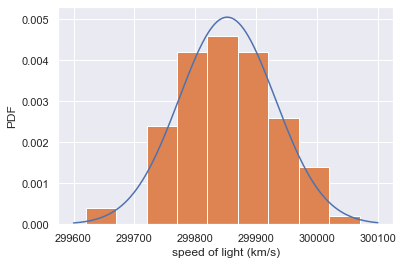

In [130]:
plt.plot(x_s, st.norm.pdf(x_s,c.mean(),c.std(ddof=1)))
plt.hist(c,density=True,bins=9)
plt.xlabel('speed of light (km/s)')
plt.ylabel('PDF')

### Simulating a normal distribution:

Text(0, 0.5, 'CDF')

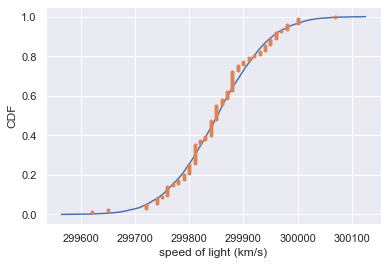

In [133]:
m_speed_of_light = df3.c.values
mean = np.mean(m_speed_of_light)
std = np.std(m_speed_of_light,ddof=1)
new_samples = np.random.normal(mean,std,size=n_samples)
x,y = cdf(m_speed_of_light)
x_calc, y_calc = cdf(new_samples)
plt.plot(x_calc,y_calc)
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('speed of light (km/s)')
plt.ylabel('CDF')